In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load data
df = pd.read_csv("/content/mbti_1.csv")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Combine all posts into one for each person
df['posts'] = df['posts'].apply(lambda x: " ".join(x.split("|||")).lower())

# Text preprocessing
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df['clean_posts'] = df['posts'].apply(clean_text)


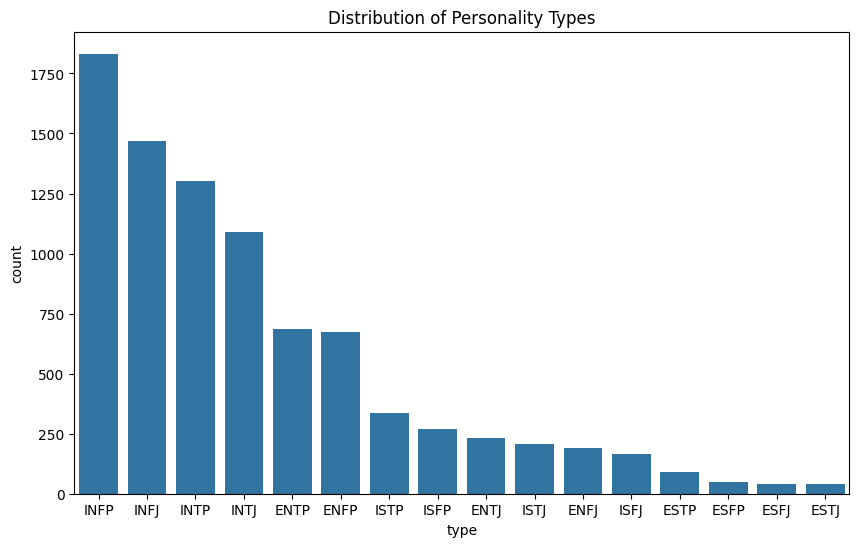

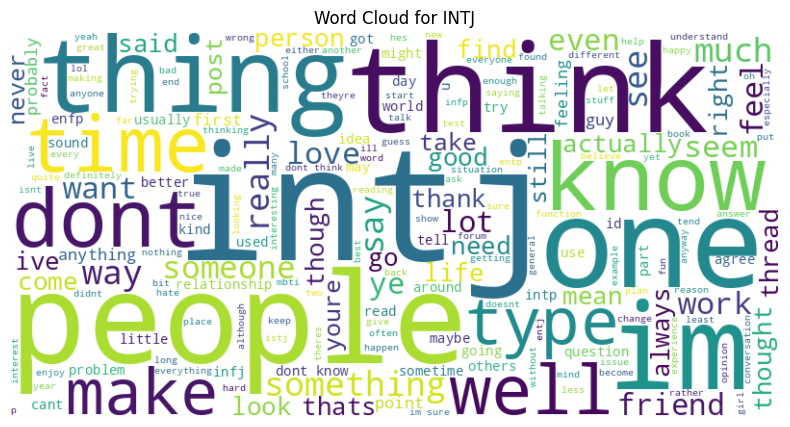

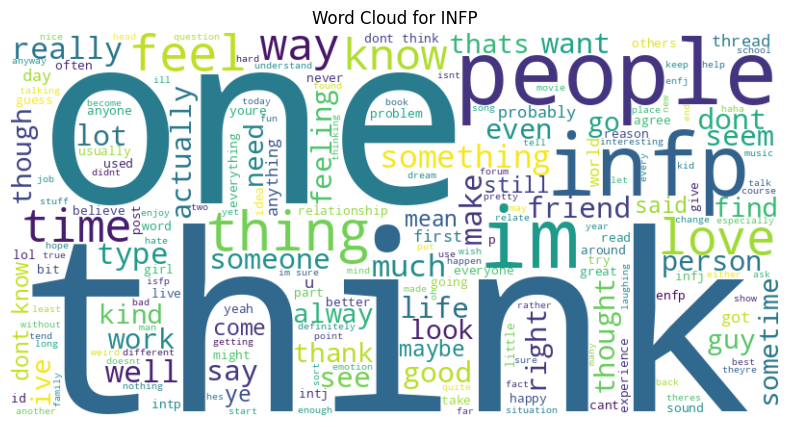

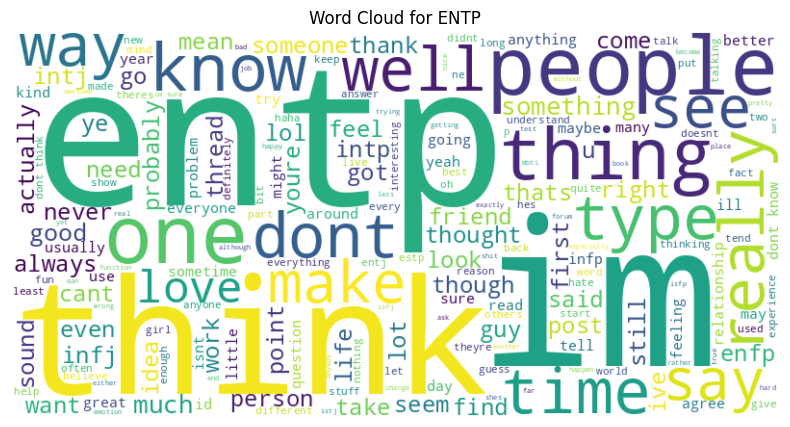

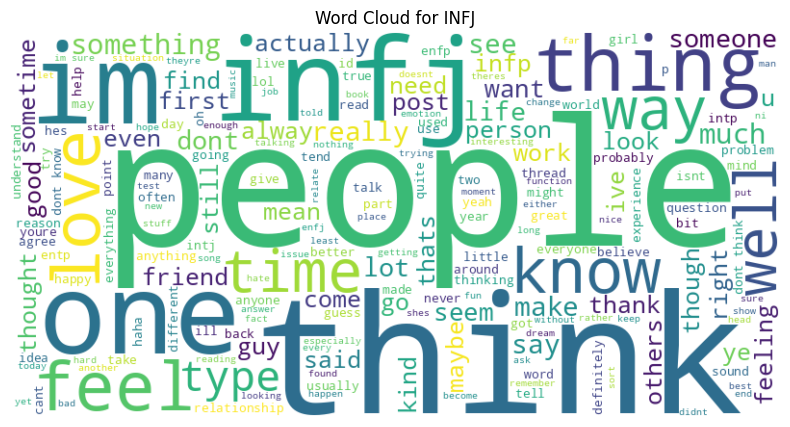

In [7]:
# Show class distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Distribution of Personality Types')
plt.show()

# WordCloud for each type
for ptype in ['INTJ', 'INFP', 'ENTP', 'INFJ']:
    text = " ".join(df[df['type'] == ptype]['clean_posts'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {ptype}")
    plt.show()


In [5]:

# Vectorize text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_posts'])
y = df['type']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.45      0.12      0.19        41
        ENFP       0.73      0.58      0.65       125
        ENTJ       0.79      0.34      0.48        44
        ENTP       0.69      0.56      0.62       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       1.00      0.13      0.24        15
        INFJ       0.66      0.69      0.68       288
        INFP       0.61      0.85      0.71       370
        INTJ       0.58      0.72      0.64       193
        INTP       0.66      0.81      0.73       293
        ISFJ       0.92      0.27      0.41        45
        ISFP       0.81      0.25      0.38        53
        ISTJ       0.69      0.20      0.32        44
        ISTP       0.74      0.42      0.53        67

    accuracy                           0.65      1735
  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


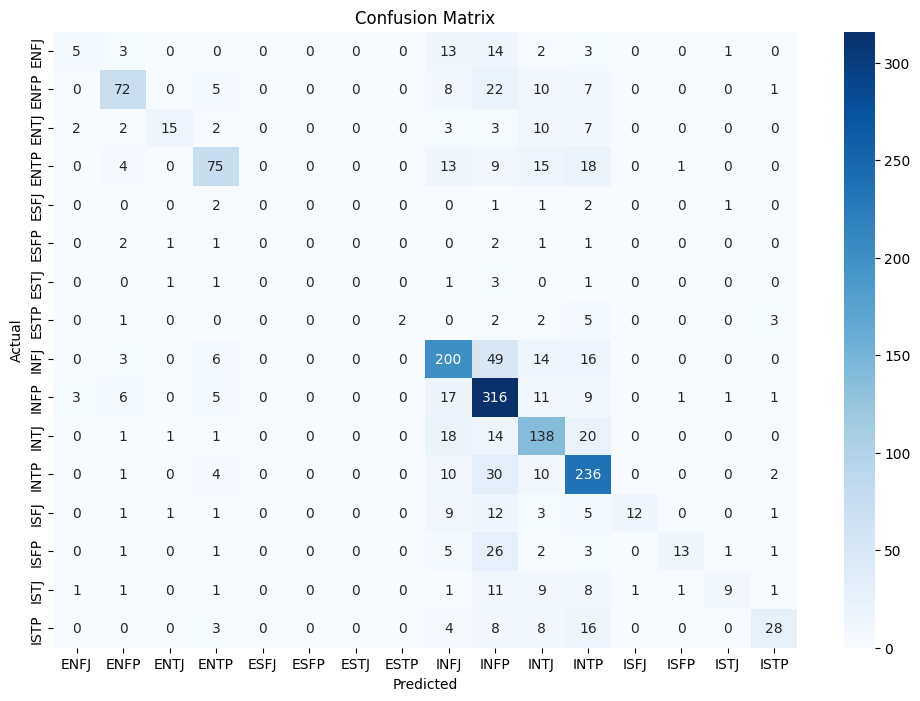


Text: I enjoy thinking about philosophy and human behavior.
Predicted Personality Type: INTJ

Text: I love leading projects and organizing people to get results.
Predicted Personality Type: INFP

Text: I’d rather spend my time writing stories and drawing.
Predicted Personality Type: INTP

Text: I often start new projects but struggle to finish them.
Predicted Personality Type: INTP


In [6]:
# Confusion matrix
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict on real-world example
examples = [
    "I enjoy thinking about philosophy and human behavior.",
    "I love leading projects and organizing people to get results.",
    "I’d rather spend my time writing stories and drawing.",
    "I often start new projects but struggle to finish them."
]

example_clean = [clean_text(text) for text in examples]
example_vec = vectorizer.transform(example_clean)
predictions = model.predict(example_vec)

for text, pred in zip(examples, predictions):
    print(f"\nText: {text}\nPredicted Personality Type: {pred}")
